DATASET 1: FASHION MNIST

In [1]:
import os
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import requests
from PIL import Image
from IPython.display import display

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])

In [3]:
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=32, shuffle=True)

100%|██████████| 26421880/26421880 [00:03<00:00, 8440918.16it/s] 


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 169607.82it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3199436.16it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 21148165.52it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [4]:
testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=32, shuffle=False)

In [5]:
model = torchvision.models.resnet18(pretrained=True)
model.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)  # Adjust for 1-channel input
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 10)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 82.7MB/s]


In [6]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [7]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [8]:
for epoch in range(30):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch {epoch + 1}, Loss: {running_loss / len(trainloader)}')

print('Finished Training')

Epoch 1, Loss: 0.5366672611355782
Epoch 2, Loss: 0.3544718556046486
Epoch 3, Loss: 0.30098641274968785
Epoch 4, Loss: 0.2676856063564618
Epoch 5, Loss: 0.24419717206756275
Epoch 6, Loss: 0.22548911594450474
Epoch 7, Loss: 0.20835807483543953
Epoch 8, Loss: 0.19301326164801916
Epoch 9, Loss: 0.18139080779453118
Epoch 10, Loss: 0.16869194034685692
Epoch 11, Loss: 0.15553534094641605
Epoch 12, Loss: 0.14712064008166392
Epoch 13, Loss: 0.13704556609963378
Epoch 14, Loss: 0.12903670098781586
Epoch 15, Loss: 0.12200365063026547
Epoch 16, Loss: 0.11398439656496048
Epoch 17, Loss: 0.10450060588978231
Epoch 18, Loss: 0.0981898620877415
Epoch 19, Loss: 0.09374953451690575
Epoch 20, Loss: 0.08950700095851595
Epoch 21, Loss: 0.07877218213578065
Epoch 22, Loss: 0.07756264015169194
Epoch 23, Loss: 0.07065397615199909
Epoch 24, Loss: 0.06875455670878292
Epoch 25, Loss: 0.06106928083491512
Epoch 26, Loss: 0.06055876994393766
Epoch 27, Loss: 0.057621202385767054
Epoch 28, Loss: 0.055035674612162015
Epo

In [9]:
correct = 0
total = 0
model.eval()
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))

Accuracy of the network on the test images: 91 %


In [10]:
fashion_classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

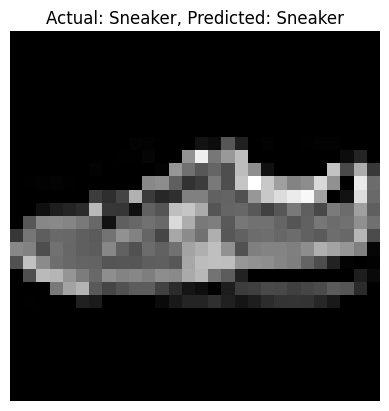

In [19]:
def random_prediction(model, dataset, classes, device):
    model.eval()
    idx = np.random.randint(0, len(dataset))
    image, label = dataset[idx]
    plt.imshow(image.squeeze(), cmap='gray')
    plt.axis('off')
    image = image.unsqueeze(0).to(device)
    with torch.no_grad():
        outputs = model(image)
        _, predicted = torch.max(outputs, 1)
    plt.title(f'Actual: {classes[label]}, Predicted: {classes[predicted.item()]}')
    plt.show()

random_prediction(model, testloader.dataset, fashion_classes, device)

In [20]:
def call_api(search_term):
    payload = {
        'source': 'amazon_search',
        'domain': 'com',
        'query': search_term,
        'start_page': 1,
        'pages': 2,
        'parse': True
    }
    response = requests.request(
        'POST',
        'https://realtime.oxylabs.io/v1/queries',
        auth=('YOUR_USERNAME', 'YOUR_PASSWORD'),
        json=payload
    )
    return response.json()

In [21]:
def find_lowest_price_item(api_response):
    if 'results' not in api_response:
        print("No 'results' key in the API response. Here's the API response for debugging:")
        print(api_response)
        return "API response error", None, None, None, 0
    lowest_price = float('inf')
    lowest_price_item = None
    total_price = 0
    count = 0
    imgurl = ""
    for result in api_response['results']:
        for item in result['content']['results']['amazons_choices'] + result['content']['results']['organic']:
            if 'price' in item and item['price'] != 0:
                count += 1
                total_price += item['price']
                if item['price'] < lowest_price:
                    lowest_price = item['price']
                    lowest_price_item = item
                    imgurl = item['url_image']
    if lowest_price_item is not None:
        average_price = round(total_price / count, 2) if count != 0 else 0
        return lowest_price_item['title'], lowest_price, imgurl, average_price, count
    else:
        return "No items found with a price", None, None, None, count

In [22]:
def run_search(search_term):
    api_response = call_api(search_term)
    name, price, imgurl, avg_price, count = find_lowest_price_item(api_response)
    name_text = "Lowest price item: " + name
    price_text = f"Price: ${price}"
    avg_text = f"Average price: ${avg_price}"
    count_text = f"{count} items checked"
    return name_text, price_text, imgurl, avg_text, count_text


In [53]:
def predict_and_search_fashion(dataset, model, device, index=-1):
    if index == -1:
        index = np.random.randint(len(dataset))

    image, label = dataset[index]
    image = image.unsqueeze(0).to(device)


    model.eval()
    with torch.no_grad():
        outputs = model(image)
        _, predicted = torch.max(outputs, 1)


    predicted_category = fashion_classes[predicted[0]]

    search_term_mapping = {
        'T-shirt/top': 'T-shirt',
        'Trouser': 'Trouser',
        'Pullover': 'Pullover',
        'Dress': 'Dress',
        'Coat': 'Coat',
        'Sandal': 'Sandal',
        'Shirt': 'Shirt',
        'Sneaker': 'Sneaker',
        'Bag': 'Bag',
        'Ankle boot': 'Ankle boot'
    }

    search_term = search_term_mapping.get(predicted_category, "Fashion")

    name_text, price_text, imgurl, avg_text, count_text = run_search(search_term)
    return name_text, price_text, imgurl, avg_text, count_text, image, label, predicted_category


name_text, price_text, imgurl, avg_text, count_text, image, true_label, predicted_category = predict_and_search_fashion(testset, model, device)

print(f'Predicted Category: {predicted_category}, True Category: {fashion_classes[true_label]}')
print(count_text)
print(avg_text)
print("############################")
print(name_text)
print(price_text)


from IPython.display import display, Image as IPyImage
if imgurl:
    display(IPyImage(url=imgurl))
else:
    print("No image URL provided.")


Predicted Category: Pullover, True Category: Pullover
95 items checked
Average price: $31.97
############################
Lowest price item: Men's Eversoft Fleece Crewneck Sweatshirts, Moisture Wicking & Breathable, Sizes S-4x
Price: $13.49


DATASET 2 - CIFAR 10


In [26]:
from torchvision import datasets, transforms
from sklearn.model_selection import train_test_split
import os
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
from torch.utils.data import DataLoader

In [27]:

transform = transforms.Compose(
    [transforms.Resize(256),
     transforms.CenterCrop(224),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=32, shuffle=True)


testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=32, shuffle=False)

100%|██████████| 170498071/170498071 [00:13<00:00, 13008528.56it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [28]:
model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 10)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [29]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [30]:
for epoch in range(3):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch {epoch + 1}, Loss: {running_loss / len(trainloader)}')

print('Finished Training')

Epoch 1, Loss: 0.43645810033179827
Epoch 2, Loss: 0.1748832067920423
Epoch 3, Loss: 0.0954042782617336
Finished Training


In [31]:
correct = 0
total = 0
model.eval()
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 94 %


In [32]:
!pip install matplotlib

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

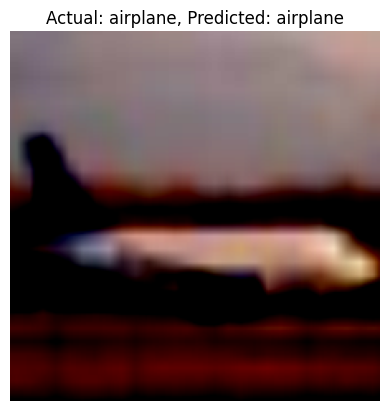

In [44]:
def random_prediction(model, dataset, classes, device):
    model.eval()
    idx = np.random.randint(0, len(dataset))
    image, label = dataset[idx]


    plt.imshow(image.permute(1, 2, 0))
    plt.axis('off')


    image = image.unsqueeze(0).to(device)

    with torch.no_grad():
        outputs = model(image)
        _, predicted = torch.max(outputs, 1)


    plt.title(f'Actual: {classes[label]}, Predicted: {classes[predicted.item()]}')
    plt.show()


cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

random_prediction(model, testloader.dataset, cifar_classes, device)

In [45]:
pip install ipython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.7 MB/s eta 0:00:00


In [46]:
import requests

def call_api(search_term):
    payload = {
        'source': 'amazon_search',
        'domain': 'com',
        'query': search_term,
        'start_page': 1,
        'pages': 2,
        'parse': True,
        # 'context': [
        #     {'key': 'category_id', 'value': 16391693031}
        #],
    }
    response = requests.request(
        'POST',
        'https://realtime.oxylabs.io/v1/queries',
        auth=('maxton', 'Cougmgj7Cougmgj7'),
        json=payload,
    )
    return response.json()

def find_lowest_price_item(api_response):
    lowest_price = float('inf')  # Set to infinity initially
    lowest_price_item = None
    total_price = 0
    count = 0
    imgurl = ""

    # Iterate over the results in the JSON response
    for result in api_response['results']:
        for item in result['content']['results']['amazons_choices'] + result['content']['results']['organic']:
            if 'price' in item and item['price'] != 0:  # Check for price key, removes false 0 prices
                count += 1
                total_price += item['price']
                if item['price'] < lowest_price:
                    lowest_price = item['price']
                    lowest_price_item = item
                    imgurl = item['url_image']

    # Check if any item with a price was found
    if lowest_price_item is not None:
        average_price = round(total_price / count, 2) if count != 0 else 0
        return lowest_price_item['title'], lowest_price, imgurl, average_price, count
    else:
        return "No items found with a price", None, None, None, count


def run_search(search_term):
    api_response = call_api(search_term)
    name, price, imgurl, avg_price, count = find_lowest_price_item(api_response)
    name_text = "Lowest price item: " + name
    price_text = f"Price: ${price}"
    avg_text = f"Average price: ${avg_price}"
    count_text = f"{count} items checked"
    return name_text, price_text, imgurl, avg_text, count_text

In [47]:
from IPython.display import Image

In [49]:
def predict_and_search(dataset, model, device, index=-1):
    # Randomly select an image
    if index == -1:
        index = np.random.randint(len(dataset))

    image, label = dataset[index]
    image = image.unsqueeze(0).to(device)

    # Predict the category
    model.eval()
    with torch.no_grad():
        outputs = model(image)
        _, predicted = torch.max(outputs, 1)

    categories = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    predicted_category = categories[predicted[0]]

    # Use the predicted category for storeCompare search
    name_text, price_text, imgurl, avg_text, count_text = run_search(predicted_category)
    return name_text, price_text, imgurl, avg_text, count_text, image, label, predicted_category

In [50]:
name_text, price_text, imgurl, avg_text, count_text, image, true_label, predicted_category = predict_and_search(testset, model, device)

# Display the results
print(f'Predicted Category: {predicted_category}, True Category: {testset.classes[true_label]}')
print(count_text)
print(avg_text)
print("############################")
print(name_text)
print(price_text)
display(Image(url=imgurl))

Predicted Category: frog, True Category: frog
96 items checked
Average price: $23.7
############################
Lowest price item: YBW pologmase Cartoon Frog Key Chain Animal Keyring PVC Key Holder for Women Men Car Key Pendant Accessories for Bags, Purse, Belt
Price: $3.56
